# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Загрузка и подготовка данных

Подключим следующие библиотеки:
- `pandas` - для последующей работы с данными и таблицами;
- `numpy` - для установления случайного состояния для воспроизводимости эксперимента;
- `sklearn` для работы с моделями, а именно:
    - `LinearRegression` - модель линейной регрессии;
    - `train_test_split` - функция для разделения данных на тестовую и тренировочную выборки;
    - `mean_squared_error` - для вычисления средней квадратической ошибки;
- `matplotlib.pyplot` для построения графиков.

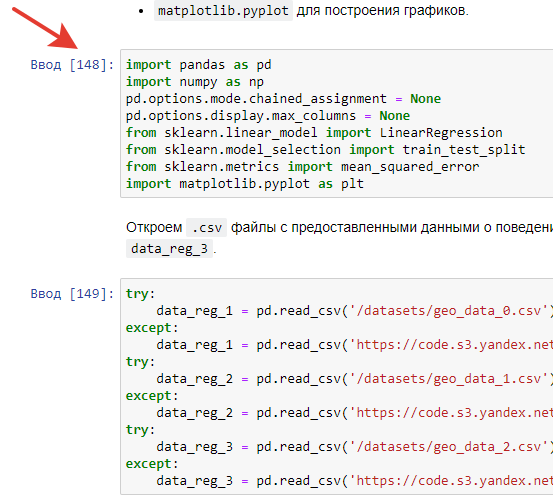

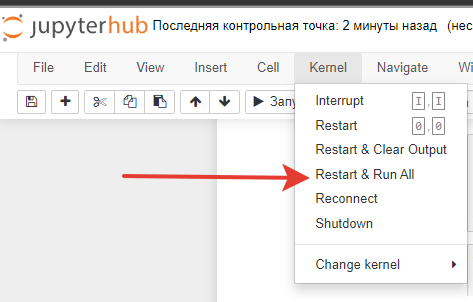

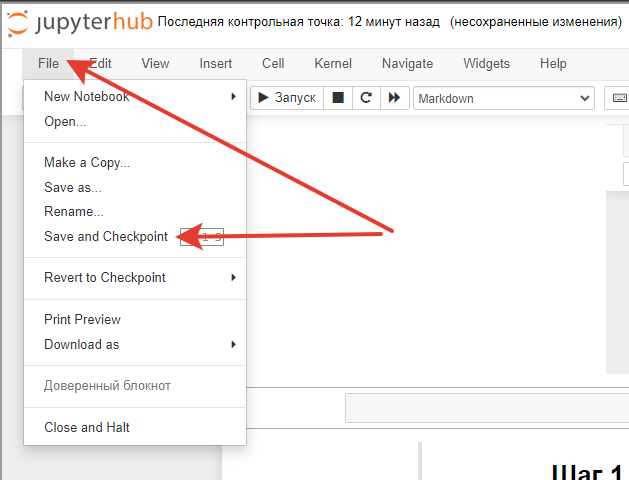

In [1]:
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None
pd.options.display.max_columns = None
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

Откроем `.csv` файлы с предоставленными данными о поведении клиентов. Запишем таблицу в переменную `data_reg_1`, `data_reg_2`, `data_reg_3`.

In [2]:
try:
    data_reg_1 = pd.read_csv('/datasets/geo_data_0.csv')
except:
    data_reg_1 = pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_0.csv')
try:
    data_reg_2 = pd.read_csv('/datasets/geo_data_1.csv')
except:
    data_reg_2 = pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_1.csv')
try:
    data_reg_3 = pd.read_csv('/datasets/geo_data_2.csv')
except:
    data_reg_3 = pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_2.csv')

Выведем для каждого датасета первые 10 строк.

In [3]:
print('Регион 1')
display(data_reg_1.head(10))
print('Регион 2')
display(data_reg_2.head(10))
print('Регион 3')
display(data_reg_3.head(10))

Регион 1


,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647
5,wX4Hy,0.969570,0.489775,-0.735383,64.741541
6,tL6pL,0.645075,0.530656,1.780266,49.055285
7,BYPU6,-0.400648,0.808337,-5.624670,72.943292
8,j9Oui,0.643105,-0.551583,2.372141,113.356160
9,OLuZU,2.173381,0.563698,9.441852,127.910945


Регион 2


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305
5,HHckp,-3.327590,-2.205276,3.003647,84.038886
6,h5Ujo,-11.142655,-10.133399,4.002382,110.992147
7,muH9x,4.234715,-0.001354,2.004588,53.906522
8,YiRkx,13.355129,-0.332068,4.998647,134.766305
9,jG6Gi,1.069227,-11.025667,4.997844,137.945408


Регион 3


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746
5,LzZXx,-0.758092,0.710691,2.585887,90.222465
6,WBHRv,-0.574891,0.317727,1.773745,45.641478
7,XO8fn,-1.906649,-2.458350,-0.177097,72.480640
8,ybmQ5,1.776292,-0.279356,3.004156,106.616832
9,OilcN,-1.214452,-0.439314,5.922514,52.954532


Выведем методом `info()` основную информацию о датасетах.

In [4]:
print('Регион 1')
data_reg_1.info()
print('Регион 2')
data_reg_2.info()
print('Регион 3')
data_reg_3.info()

Регион 1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
Регион 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
Регион 3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 column

Получим основную статистическую информацию о выборках методом `describe()`.

In [5]:
print('Регион 1')
display(data_reg_1.describe())
print('Регион 2')
display(data_reg_2.describe())
print('Регион 3')
display(data_reg_3.describe())

Регион 1


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


Регион 2


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


Регион 3


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


Построим графики по имеющимся столбцам для каждого из датафреймов.

Регион 1


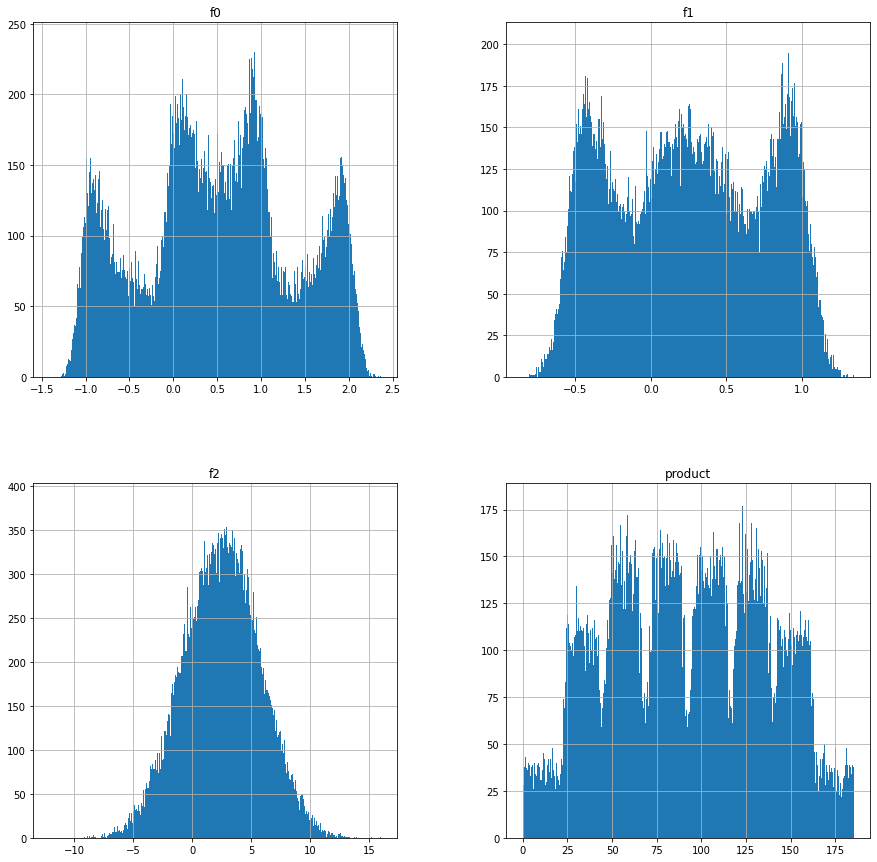

In [6]:
print('Регион 1')
data_reg_1.hist(figsize=(15, 15), bins=1000);

Регион 2


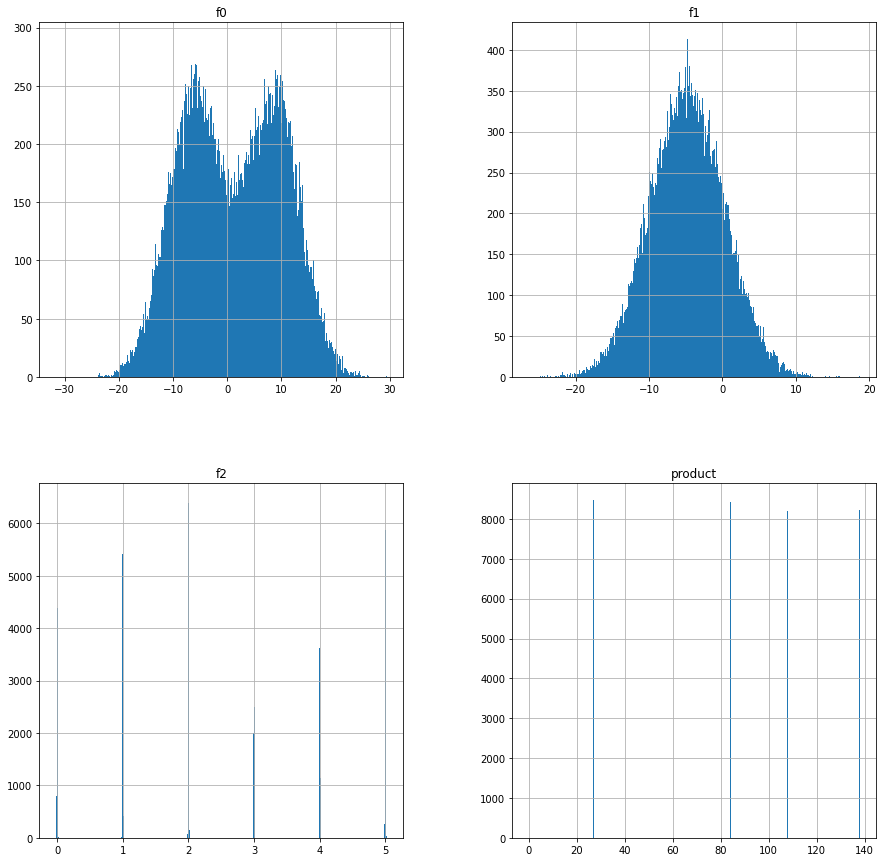

In [7]:
print('Регион 2')
data_reg_2.hist(figsize=(15, 15), bins=1000);

Регион 3


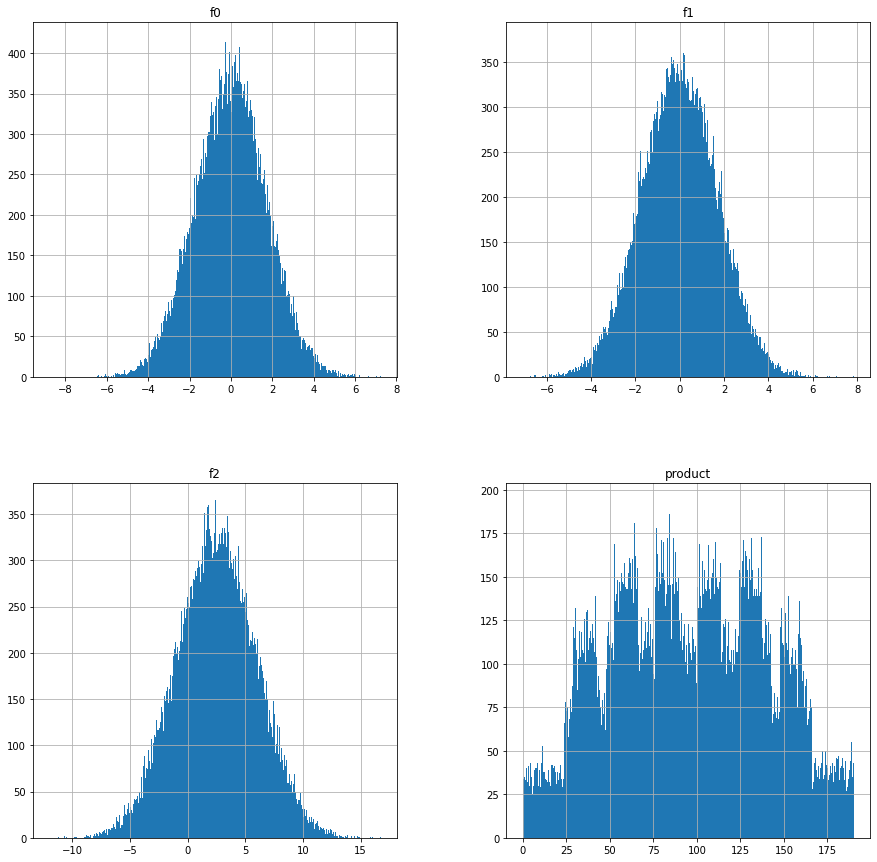

In [8]:
print('Регион 3')
data_reg_3.hist(figsize=(15, 15), bins=1000);

По итогам можно сказать, что в каждом из 3 датафреймов присутствует по 100000 значений для региона, сами данные имеют различный разброс для каждого региона, пропуски в данных отсутствуют.

Поступим с имеющимися данными следующим образом:
 - Удалим колонку `id` из всех датафреймов, так как это просто нумерация скважин и не является данными, которые помогут посторить модель;
 - Для каждого региона выделим целевой `product` в серию `target_reg_i`, а признаки в датафрейм `features_reg_i`, где i - число от 1 до 3 для соответствующего региона.

In [9]:
features_reg_1 = data_reg_1.drop(columns=['id', 'product'])
features_reg_2 = data_reg_2.drop(columns=['id', 'product'])
features_reg_3 = data_reg_3.drop(columns=['id', 'product'])
target_reg_1 = data_reg_1['product']
target_reg_2 = data_reg_2['product']
target_reg_3 = data_reg_3['product']

## Обучение и проверка модели

Разделим для каждого региона данные на обучающую и валидационную выборки. Также разделим данные по спискам для упрощения работы с ними в дальнейшем.

In [10]:
features_targets = [[features_reg_1, target_reg_1], [features_reg_2, target_reg_2], [features_reg_3, target_reg_3]]
features_targets_train = []
features_targets_valid = []
for i in range(3):
    features_targets_iter = train_test_split(features_targets[i][0], features_targets[i][1], test_size=0.25, random_state=12345)
    features_targets_train.append([features_targets_iter[0], features_targets_iter[2]])
    features_targets_valid.append([features_targets_iter[1], features_targets_iter[3]])

Обучим теперь модель линейной регрессии для каждого региона. Поступим так:
 - Обучим модель для каждого региона на тренировочной выборке;
 - Получим предсказания модели на валидационной выборке;
 - Сравним их с истинными предсказаниями, высчитаем корень из средней квадратической ошибки и среднее значение целевого признака для каждого региона, выведем полученные данные на экран.

In [11]:
models = []
predictions_valid = []
mse_valid = []
rmse_valid = []
means_valid = []
for i in range(3):
    models.append(LinearRegression())
    models[i].fit(features_targets_train[i][0], features_targets_train[i][1])
    predictions_valid.append(models[i].predict(features_targets_valid[i][0]))
    means_valid.append(predictions_valid[i].mean())
    mse_valid.append(mean_squared_error(features_targets_valid[i][1], predictions_valid[i]))
    rmse_valid.append(mse_valid[i] ** 0.5)
    print(f'Для региона {i+1}:\n    Среднее значение: {means_valid[i]:.2f}\n    Корень из средней квадратической ошибки: {rmse_valid[i]:.2f}')

Для региона 1:
    Среднее значение: 92.59
    Корень из средней квадратической ошибки: 37.58
Для региона 2:
    Среднее значение: 68.73
    Корень из средней квадратической ошибки: 0.89
Для региона 3:
    Среднее значение: 94.97
    Корень из средней квадратической ошибки: 40.03


В 1 регионе и в 3 регионе среднее предсказанное значение запасов нефти в скважине выше чем во втором регионе и примерно равно 94 тыс. баррелей (92,59 тыс. баррелей в первом регионе и 94,97 тыс. баррелей во втором регионе), но при этом корень из средней квадратической ошибки  крайне высок - около 38,5 баррелей (37,58 тыс. баррелей и 40,03 тыс. баррелей соответственно), в то время как во втором регионе меньший средний запас нефти в месторождении - 68,73 тыс. баррелей, но при этом крайне низкий корень из среднеквадратической ошибки - 0,89 тыс. баррелей.

## Подготовка к расчёту прибыли

Сохраним ключевые параметры для расчётов в отдельные переменные:
 - `sample = 500` - количество точек, которые выбирают при помощи машинного обучения;
 - `best_sample = 200` - количество лучших из 500 точек выбранных изначально;
 - `budget_region = 1000000` - бюджет на регион (в тыс. руб.);
 - `barrel_price = 450` - цена за тысячу баррелей нефти (в тыс. руб.);
 - `risk_percent = 0.025` - максимальная вероятность убытков.

In [12]:
sample = 500
best_sample = 200
budget_region = 10000000
barrel_price = 450
risk_percent = 0.025

Найдём достаточный объём сырья в скважине, достаточный для безубыточной разработки региона. Для этого разделим общий бюджет на количество скважин в регионе и на цену тыс. баррелей.

In [13]:
mean_enough_volume = budget_region / best_sample / barrel_price
print(f'Достаточный минимальный объём скважины для того, чтобы бюджет окупился: {mean_enough_volume:.2f} тыс. баррелей')

Достаточный минимальный объём скважины для того, чтобы бюджет окупился: 111.11 тыс. баррелей


Во всех 3 регионах средний запас нефти в скважине сильно ниже, чем требуемое значение, однако данное значение лежит в границах одного корня из средней квадратической ошибки для регионов 1 и 3.

Напишем функцию, которая в дальнейшем будет использована для расчёта прибыли по выбранным скважинам и предсказаниям модели.
Функция `revenue` будет выполнять следующее:
 - Выбирать скважины с максимальными значениями предсказаний;
 - Суммировать целевое значение объёма сырья, соответствующее этим предсказаниям;
 - Рассчитывать прибыль для полученного объёма сырья.

In [14]:
def revenue(predictions, target):
    return target[predictions.sort_values(ascending=False).head(best_sample).index].sum() * barrel_price - budget_region

Также создадим функцию `bootstrap`, которая будет реализовывать технику Bootstrap, подсчитывать среднюю прибыль, 95%-й доверительный интервал и риск убытков. Также зададим переменную state, которая будет отвечать за воспроизваодимость эксперимента.

In [15]:
def bootstrap(predictions, target, size):
    revenue_list = []
    target.reset_index(drop=True, inplace=True)
    for i in range(size):
        predictions_subsample = predictions.sample(n=sample, replace=True, random_state=state)
        target_subsample = target.loc[predictions_subsample.index]
        revenue_list.append(revenue(predictions_subsample, target_subsample))
    revenue_list = pd.Series(revenue_list)
    mean_bootstrap = revenue_list.mean()
    lower = revenue_list.quantile(0.025)
    higher = revenue_list.quantile(0.975)
    p_value = revenue_list[revenue_list < 0].count() / size
    if p_value >= risk_percent: return mean_bootstrap, lower, higher, p_value, 0
    return mean_bootstrap, lower, higher, p_value, 1

state = np.random.RandomState(12345)

## Расчёт прибыли и рисков 

Воспользуемся написанными выше функциями и выведем искомые параметры на экран для каждого региона.

In [16]:
print('Метод Bootstrap:\n')
max_rev = 0
max_rev_reg = 0
for i in range(3):
    results = bootstrap(pd.Series(predictions_valid[i]), features_targets_valid[i][1], 1000)
    print(f'{i+1}-й регион:\n    Средняя прибыль: {results[0]:.2f}\n'
          f'    95%-й доверительный интервал: [{results[1]:.2f},{results[2]:.2f}]\n'
          f'    Риск убытков: {results[3]:.2%}')
    if results[4] == 0:
        print('    Риск убытков превышает максимальный порог\n')
    else:
        print('    Риск убытков ниже максимального порога\n')

Метод Bootstrap:

1-й регион:
    Средняя прибыль: 600735.24
    95%-й доверительный интервал: [12948.33,1231163.61]
    Риск убытков: 2.00%
    Риск убытков ниже максимального порога

2-й регион:
    Средняя прибыль: 663959.00
    95%-й доверительный интервал: [206476.36,1191197.68]
    Риск убытков: 0.10%
    Риск убытков ниже максимального порога

3-й регион:
    Средняя прибыль: 597381.05
    95%-й доверительный интервал: [1734.93,1246217.96]
    Риск убытков: 2.50%
    Риск убытков превышает максимальный порог



Таким образом, получаем, что в 3-м регионе риск убытков слишком высок, так как он составляет как раз пороговые 2,5%, соответственно разрабатывать месторождения в этом регионе слишком рисковано. Риск убытков в 1-м и 2-м регионах не превышает порогового значения в 2,5% и составляет 2% и 0,1% соответственно.

Так как они преодолели порог риска, то среди 1-го и 2-го регионов следует выбирать лучший по критерию средней вероятной прибыли. Соответственно выбрать следует 2-й регион, так как средняя вероятная прибыль наибольшая среди двух регионов и составляет 663959 тыс. руб. (663,959 млн руб.), что выше чем в 1-м регионе на 63223,76 тыс. руб. (выше приблизительно на 10%).

Следует при этом заметить, что во втором регионе также сильно выше значение 0,025-го квантиля, что говорит о том, что в нём в целом выше минимальная возможная прибыль (наибольшая среди всех регионов), а 0,975-е квантили примерно равны друг другу (во всех регионах).

### Вывод

По проделанным расчётам методом Bootstrap был получен следующий результат: **для разработки местораждений предпочтительнее выбрать 2 регион**, так как вероятность риска не окупить вложения в нём составляет 0,1%, а средняя вероятная прибыль больше чем в двух других регионах и составляет 663,959 млн. руб.

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: модели обучены и проверены
    - [x]  Данные корректно разбиты на обучающую и валидационную выборки
    - [x]  Модели обучены, предсказания сделаны
    - [x]  Предсказания и правильные ответы на валидационной выборке сохранены
    - [x]  На экране напечатаны результаты
    - [x]  Сделаны выводы
- [x]  Выполнен шаг 3: проведена подготовка к расчёту прибыли
    - [x]  Для всех ключевых значений созданы константы Python
    - [x]  Посчитано минимальное среднее количество продукта в месторождениях региона, достаточное для разработки
    - [x]  По предыдущему пункту сделаны выводы
    - [x]  Написана функция расчёта прибыли
- [x]  Выполнен шаг 4: посчитаны риски и прибыль
    - [x]  Проведена процедура *Bootstrap*
    - [x]  Все параметры бутстрепа соответствуют условию
    - [x]  Найдены все нужные величины
    - [x]  Предложен регион для разработки месторождения
    - [x]  Выбор региона обоснован